In [1]:
import torch
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

from models.vae import VanillaVAE
from models.vae import BaseModel as BaseVAE
# from models.encoder import BaseModel as EctEncoder
from layers.ect import EctLayer, EctConfig

from metrics.metrics import get_mse_metrics
from metrics.accuracies import compute_mse_accuracies
from metrics.loss import compute_mse_loss_fn
from layers.directions import generate_directions
from datasets import load_datamodule

DEVICE = "cuda:0"
import pyvista as pv

layer = EctLayer(
            EctConfig(
                num_thetas=96,
                bump_steps=96,
                device="cuda:0",
                ect_type="points",
                normalized=True
            ),
            v=generate_directions(96, 3, "cuda:0"),
        )


config = OmegaConf.load("./configs/config_vae_shapenet_airplane.yaml")
dm = load_datamodule(config.data)

vae_model = VanillaVAE(in_channels=1, latent_dim=128,img_size=96)


# Load the VAE model

metrics = get_mse_metrics()

vae_litmodel = BaseVAE.load_from_checkpoint(
    f"./trained_models/vae_shapenet_{config.data.categories[0]}.ckpt",
    model=vae_model,
    training_accuracy=metrics[0],
    test_accuracy=metrics[1],
    validation_accuracy=metrics[2],
    accuracies_fn=compute_mse_accuracies,
    loss_fn=compute_mse_loss_fn,
    learning_rate=0.01,
    layer=None,
).to(DEVICE)

vae_litmodel = vae_litmodel.eval()

C:\Users\ernst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch_geometric\data\dataset.py:239: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, pass `force_reload=True` explicitly to reload the dataset.
  warnings.warn(


TypeError: VanillaVAE.__init__() got an unexpected keyword argument 'in_channels'

In [77]:
for batch in dm.val_dataloader():
    break 
batch.cuda()
ect = layer(batch,batch.batch)

print(ect.shape)

decoded, input_tensor, mu, log_var = vae_litmodel(ect.unsqueeze(1))

decoded = (decoded + 1) / 2

torch.Size([32, 96, 96])


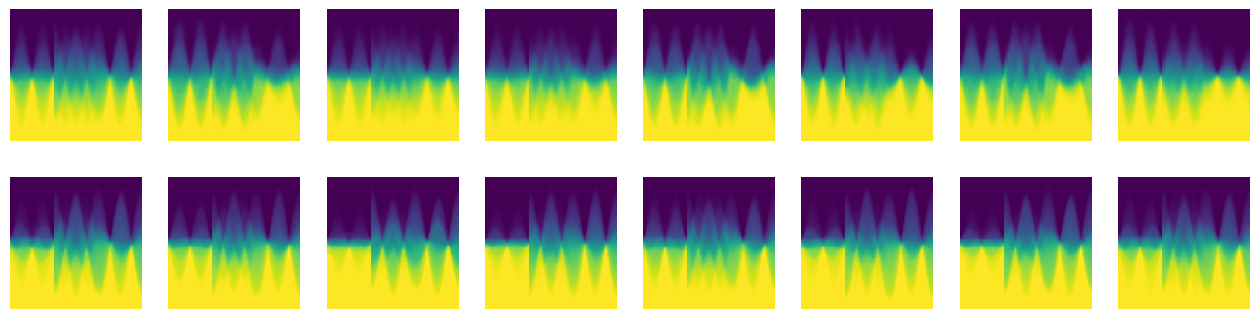

In [78]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,8,figsize=(16,4))

for ax,rec,orig in zip(axes.T,decoded.squeeze(),ect.squeeze()):
    ax[0].imshow(rec.cpu().detach().squeeze().numpy())
    ax[0].axis("off")
    ax[1].imshow(orig.cpu().detach().squeeze().numpy())
    ax[1].axis("off")

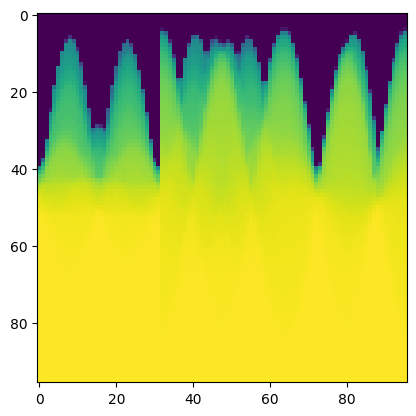

In [79]:
img = (ect[0]+1e-5).log()
plt.imshow(img.cpu().detach().squeeze().numpy())

In [80]:
img.max()

tensor(1.0014e-05, device='cuda:0')